In [2]:
#https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

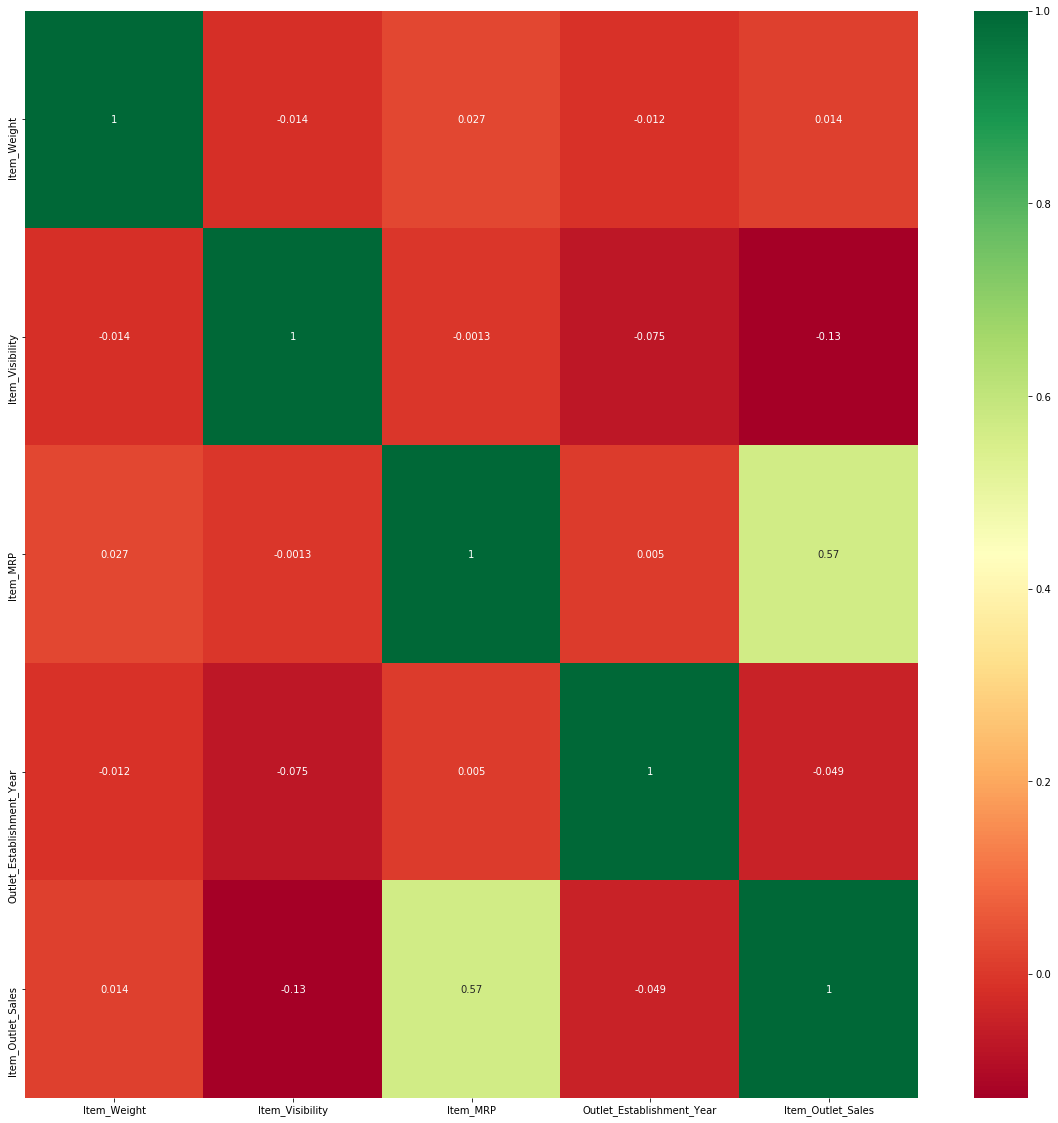

In [9]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(train[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [10]:
train.isnull().sum().sort_values(ascending = False).head()

Outlet_Size             2410
Item_Weight             1463
Item_Outlet_Sales          0
Outlet_Type                0
Outlet_Location_Type       0
dtype: int64

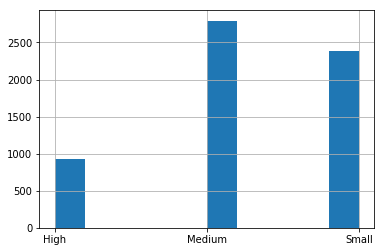

In [11]:
train['Outlet_Size'].hist()

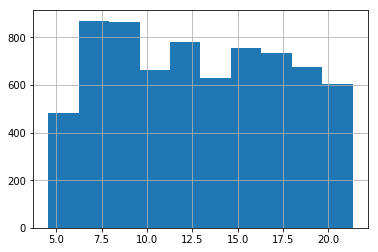

In [12]:
train['Item_Weight'].hist()

In [13]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace = True)
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

In [14]:
train.isnull().sum().sort_values(ascending = False).head()

Item_Outlet_Sales            0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending = False).head()


Outlet_Size                  1606
Item_Weight                   976
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
dtype: int64

In [16]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

In [17]:
test.isnull().sum().sort_values(ascending = False).head()

Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Item_MRP                     0
dtype: int64

In [18]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
from sklearn.preprocessing import LabelEncoder
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
le = LabelEncoder()
#post
ptrain = train
ptest = test
for i in cols:
    ptrain[i] = le.fit_transform(train[i])
    ptest[i] = le.fit_transform(test[i])

In [20]:
ptrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [21]:
ptest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3


In [22]:
ptrain.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


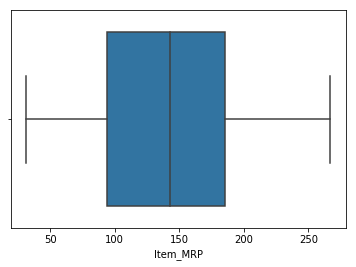

In [23]:
sns.boxplot(x = ptrain['Item_MRP'])

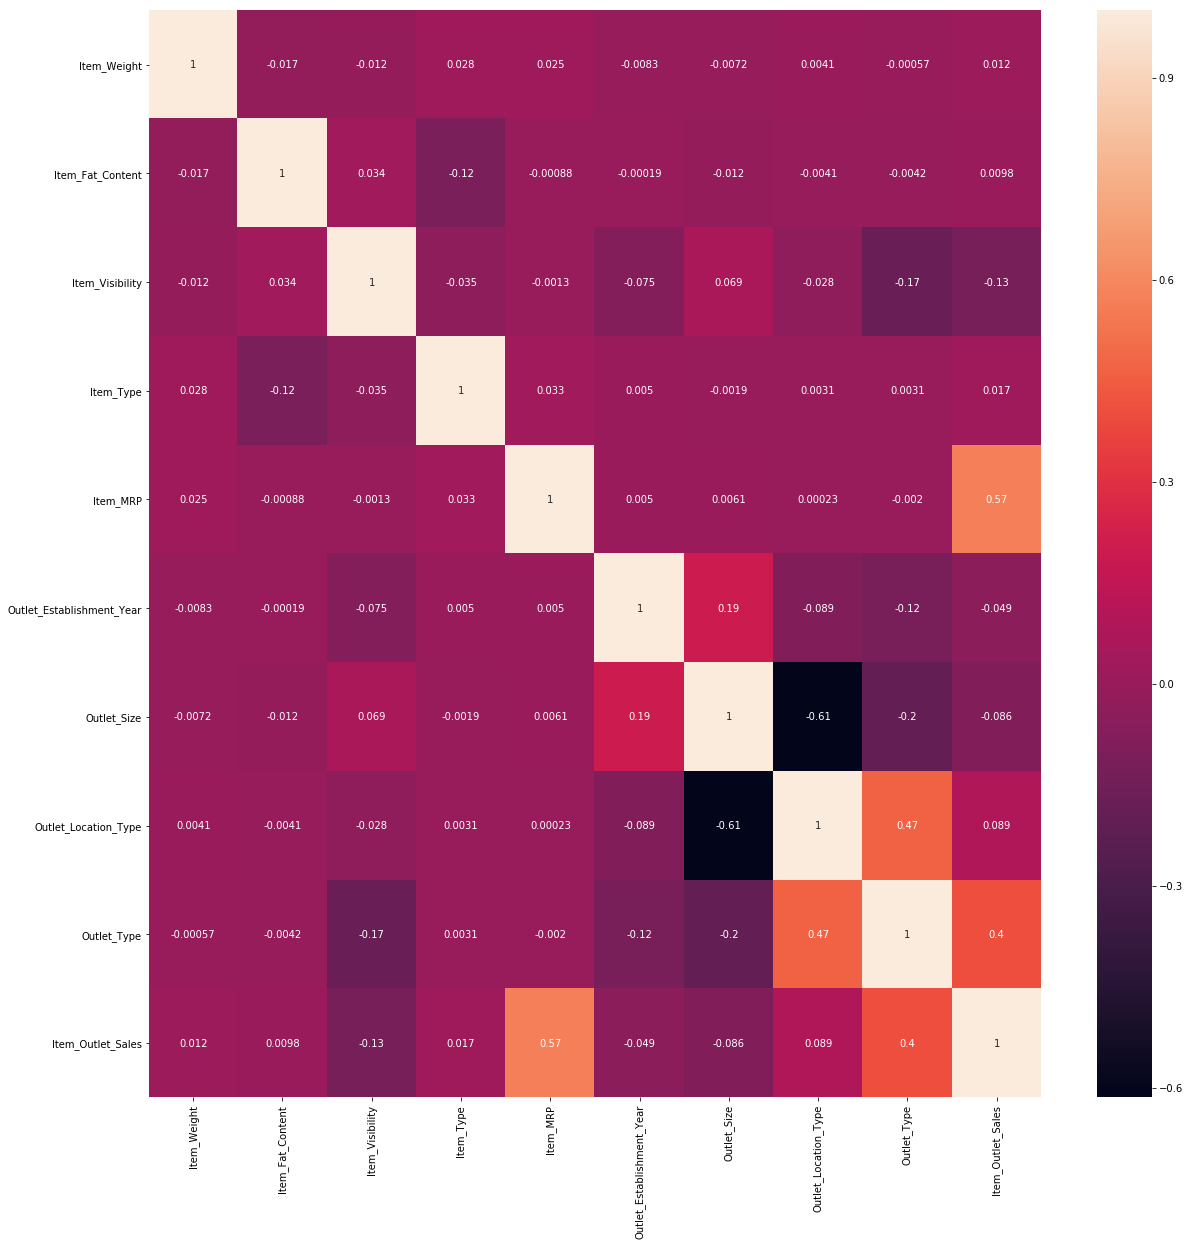

In [24]:
corrmat = ptrain.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(ptrain[top_corr_features].corr(), annot = True)

In [25]:
most_corr = ['Item_MRP', 'Outlet_Type', 'Item_Visibility']

In [32]:
from sklearn.linear_model import LinearRegression
X = ptrain.loc[:, ptrain.columns != 'Item_Outlet_Sales']
y = ptrain[['Item_Outlet_Sales']]
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.5078834960048506

In [27]:
X = ptrain[most_corr]
reg.fit(X, y)
reg.score(X, y)

0.48773508935779175

In [28]:
norm_train = (ptrain-ptrain.min())/(ptrain.max()-ptrain.min())

In [29]:
X = norm_train.loc[:, norm_train.columns != 'Item_Outlet_Sales']
y = norm_train[['Item_Outlet_Sales']]
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.5078834960048506

In [30]:
#not efficient

In [31]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(solver = 'lbfgs', alpha = 1e-2, hidden_layer_sizes = (100, ), random_state = 1)
reg.fit(X, y)
reg.score(X, y)

c:\users\felip\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6091064399667886

In [33]:
#simple linear regression presented the best score in the competition
newtest = pd.read_csv('test.csv')
submission = pd.DataFrame()
submission['Item_Identifier'] = newtest['Item_Identifier']
submission['Outlet_Identifier'] = newtest['Outlet_Identifier']
submission['Item_Outlet_Sales'] = reg.predict(ptest)
submission.to_csv('submission.csv', index = False)